In [1]:
# Notebook mainly used for the Coursera Capstone project

In [2]:
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y

In [3]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv", low_memory=False)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df = df[['SEVERITYCODE', 'ADDRTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]
df['SEVERITYCODE'] = df['SEVERITYCODE'].astype('int')
df.head()

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Overcast,Wet,Daylight
1,1,Block,Raining,Wet,Dark - Street Lights On
2,1,Block,Overcast,Dry,Daylight
3,1,Block,Clear,Dry,Daylight
4,2,Intersection,Raining,Wet,Daylight


In [6]:
df['ADDRTYPE'].replace(np.nan, 'Unknown', inplace=True)
df['ADDRTYPE'].replace(['Block','Intersection','Unknown','Alley'], value=[0,1,2,3],inplace=True)

In [7]:
df['LIGHTCOND'].replace(np.nan, 'Unknown', inplace=True)
df['LIGHTCOND'].replace(['Daylight','Dark - Street Lights On','Unknown','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off',
                                    'Other','Dark - Unknown Lighting'], value=[0,1,2,3,4,5,6,7,8],inplace=True)

In [8]:
df['ROADCOND'].replace(np.nan, 'Unknown', inplace=True)
df['ROADCOND'].replace(to_replace=['Dry','Wet','Unknown','Ice','Snow/Slush','Other','Standing Water',
                                'Sand/Mud/Dirt','Oil'], value=[0,1,2,3,4,5,6,7,8],inplace=True)

In [9]:
df['WEATHER'].replace(np.nan, 'Unknown', inplace=True)
df['WEATHER'].replace(to_replace=['Clear','Raining','Overcast','Unknown','Snowing','Other','Fog/Smog/Smoke',
                                'Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'], value=[0,1,2,3,4,5,6,7,8,9,10],inplace=True)

In [10]:
X=np.asarray(df[['ADDRTYPE','LIGHTCOND','ROADCOND','WEATHER']].astype('float'))
X[0:5]

array([[1., 0., 1., 2.],
       [0., 1., 1., 1.],
       [0., 0., 0., 2.],
       [0., 0., 0., 0.],
       [1., 0., 1., 1.]])

In [11]:
y=np.asarray(df['SEVERITYCODE'].astype('float'))
y[0:5]

array([2., 1., 1., 1., 2.])

In [12]:
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.21000624, -0.62441224,  0.63201046,  1.01431444],
       [-0.697357  ,  0.30978034,  0.63201046,  0.14651639],
       [-0.697357  , -0.62441224, -0.63653929,  1.01431444],
       [-0.697357  , -0.62441224, -0.63653929, -0.72128165],
       [ 1.21000624, -0.62441224,  0.63201046,  0.14651639]])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 4) (155738,)
Test set: (38935, 4) (38935,)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [15]:
yhat = LR.predict(X_test)
yhat

array([1., 1., 1., ..., 1., 1., 1.])

In [16]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.75667144, 0.24332856],
       [0.65744509, 0.34255491],
       [0.79664879, 0.20335121],
       ...,
       [0.7001033 , 0.2998967 ],
       [0.74789383, 0.25210617],
       [0.75667144, 0.24332856]])

In [17]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.6997816874277643

In [18]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5882881730671329

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

         1.0       0.70      0.99      0.82     27425
         2.0       0.18      0.00      0.01     11510

   micro avg       0.70      0.70      0.70     38935
   macro avg       0.44      0.50      0.42     38935
weighted avg       0.55      0.70      0.58     38935



In [20]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[27197     0]
 [    0     0]]


Confusion matrix, without normalization
[[27197   228]
 [11461    49]]


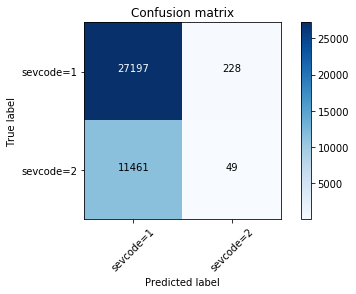

In [21]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['sevcode=1','sevcode=2'],normalize= False,  title='Confusion matrix')